# Compensate and classify

In [130]:
import pandas as pd
from pandas import read_csv
from scipy.stats import nbinom
from functions.rnaseq_data_generator import rna_seq_generator, NormalDistributionParameters
from utils.enums import Distribution
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Effected transcripts

In [126]:
# Load DEG data
exp_samples = read_csv('Exp_sclass_OT_CR.csv')
exp_samples = exp_samples.rename(columns={"Unnamed: 0": "genes"})

pd.to_numeric(exp_samples.padj)
exp_samples = exp_samples.drop(exp_samples[exp_samples.padj > 0.05].index)

print('Number of effected transcripts =', exp_samples.shape[0])
print('Effected transcripts: \n', exp_samples.genes)
exp_samples.head(6)

Number of effected transcripts = 5
Effected transcripts: 
 0    ENST00000569977.1
1    ENST00000557821.5
2    ENST00000393797.6
3    ENST00000614293.4
4    ENST00000395059.6
Name: genes, dtype: object


,genes,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name
0,ENST00000569977.1,13.270496,1.300237,0.241791,5.377530,7.551460e-08,0.006837,ADGRG3
1,ENST00000557821.5,28.228405,0.810769,0.152515,5.315998,1.060745e-07,0.006837,PLCB2
2,ENST00000393797.6,17.100444,0.953700,0.183223,5.205121,1.938701e-07,0.008330,ARHGAP9
3,ENST00000614293.4,11.759191,1.131641,0.220567,5.130605,2.888131e-07,0.009307,ABCA2
4,ENST00000395059.6,28.736745,0.636468,0.126414,5.034804,4.783376e-07,0.012332,SRCAP


In [127]:
# Load all samples
OT_CR_samples = read_csv('../19NQ013_samples.csv')
OT_CR_samples = OT_CR_samples.set_index('genes')
samples = OT_CR_samples.loc[exp_samples.genes]
drop_list = []
# leave only OT and CR classes
for patient in samples.columns:
    if patient[:2] != 'OT' and patient[:2] != 'CR':
        drop_list.append(patient)
genes = samples.index.values
samples = samples.drop(drop_list[0:], axis=1)
samples.head()

,OT_05,OT_17,OT_18,OT_21,OT_23,OT_33,OT_34,OT_62,OT_63,OT_64,...,CR_3,CR_4,CR_5,CR_6,CR_7,CR_8,CR_9,CR_10,CR_11,CR_13
genes,,,,,,,,,,,,,,,,,,,,,
ENST00000569977.1,10,16,13,15,11,8,16,8,16,8,...,6,7,7,2,2,6,7,3,5,13
ENST00000557821.5,24,41,28,41,22,36,26,35,39,36,...,20,22,22,10,15,37,14,13,25,31
ENST00000393797.6,22,22,17,29,21,20,15,10,37,16,...,7,16,12,3,17,10,8,11,16,15
ENST00000614293.4,17,17,15,10,17,8,9,12,17,17,...,2,15,6,4,4,3,5,3,7,19
ENST00000395059.6,24,38,32,26,32,38,23,23,45,31,...,18,37,25,14,19,21,21,17,24,26


## Distribution of transcripts with padj < 0.05 (OT and CR samples)

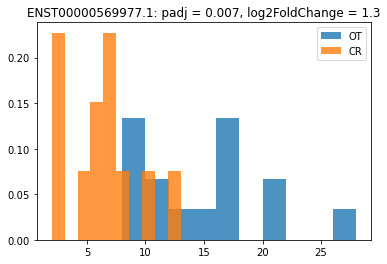

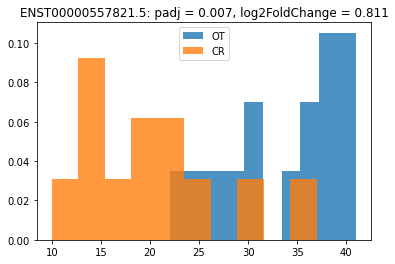

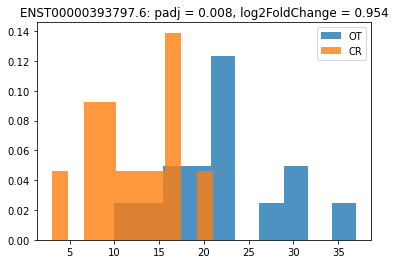

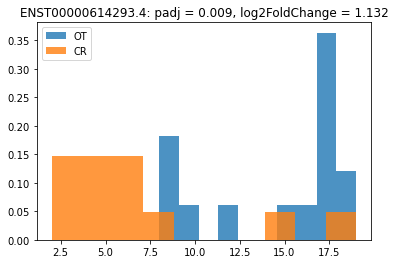

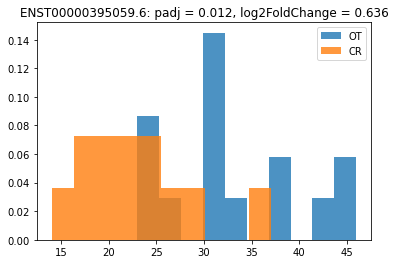

In [174]:
OT_samples_label = ['OT_05', 'OT_17','OT_18', 'OT_21', 'OT_23', 'OT_33', 'OT_34', 'OT_62', 'OT_63', 'OT_64', 'OT_65', 'OT_66', 'OT_67', 'OT_69', 'OT_71']
CR_samples_label = ['CR_1', 'CR_2', 'CR_3', 'CR_4', 'CR_5', 'CR_6', 'CR_7', 'CR_8', 'CR_9', 'CR_10', 'CR_11', 'CR_13']
for transcript in exp_samples.genes[:6]:
    OT_transcript = samples.loc[transcript, OT_samples_label]
    CR_transcript = samples.loc[transcript, CR_samples_label]
    OT_hist = plt.hist(OT_transcript.to_numpy(), alpha= 0.8, density=True, label='OT')
    CR_hist = plt.hist(CR_transcript.to_numpy(), alpha= 0.8, density=True, label='CR')

    # Neg Binomial estimation
    # for t in [OT_transcript, CR_transcript]:
    #     x = range(0, max(t))
    #     mean = t.mean()
    #     std = t.std()
    #     p = mean/std**2
    #     n = mean*p/(1.0 - p)
    #     plt.plot(x, nbinom.pmf(x, n, p), label='Negative Binomial')

    padj = round(exp_samples.loc[exp_samples.genes == transcript].padj.iloc[0], 3)
    log2fc = round(exp_samples.loc[exp_samples.genes == transcript].log2FoldChange.iloc[0], 3)
    plt.title(transcript + ': padj = ' + str(padj) + ', log2FoldChange = ' + str(log2fc))
    plt.legend()
    plt.show()